<a href="https://colab.research.google.com/github/TeleeshaSewmini/My-AI-Project/blob/main/Week2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd

# Load the dataset from a URL

url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data'

# The dataset does not have a header, so we need to provide column names

column_names = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target']

df = pd.read_csv(url, header=None, names=column_names)

# Let's inspect the data

print(df.head())

df.info()

    age  sex   cp  trestbps   chol  fbs  restecg  thalach  exang  oldpeak  \
0  63.0  1.0  1.0     145.0  233.0  1.0      2.0    150.0    0.0      2.3   
1  67.0  1.0  4.0     160.0  286.0  0.0      2.0    108.0    1.0      1.5   
2  67.0  1.0  4.0     120.0  229.0  0.0      2.0    129.0    1.0      2.6   
3  37.0  1.0  3.0     130.0  250.0  0.0      0.0    187.0    0.0      3.5   
4  41.0  0.0  2.0     130.0  204.0  0.0      2.0    172.0    0.0      1.4   

   slope   ca thal  target  
0    3.0  0.0  6.0       0  
1    2.0  3.0  3.0       2  
2    2.0  2.0  7.0       1  
3    3.0  0.0  3.0       0  
4    1.0  0.0  3.0       0  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    float64
 1   sex       303 non-null    float64
 2   cp        303 non-null    float64
 3   trestbps  303 non-null    float64
 4   chol      303 non-n

In [3]:
# The 'target' column is our answer key (0 = no disease, 1-4 = disease). Let's simplify it to a binary problem.

df['target'] = df['target'].apply(lambda x: 1 if x > 0 else 0)

# X contains all the columns we use for prediction

X = df.drop('target', axis=1)

# y contains only the column we want to predict

y = df['target']

print("Shape of our features (X):", X. shape)

print("Shape of our target (y):", y.shape)

Shape of our features (X): (303, 13)
Shape of our target (y): (303,)


In [4]:
from sklearn.model_selection import train_test_split

# Split the data: 80% for training, 20% for testing

# random_state ensures we all get the same split for reproducibility

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Number of training samples:", X_train.shape[0])

print("Number of testing samples:", X_test.shape[0])

Number of training samples: 242
Number of testing samples: 61


In [20]:
from sklearn. neighbors import KNeighborsClassifier
from sklearn. impute import SimpleImputer # New step to handle missing values
from sklearn.pipeline import Pipeline # To chain steps together

# The dataset has '?' for missing values. Let's handle this professionally.
# This pipeline will first replace missing values with the mean, then run the classifier.
# Note: This is a slightly more advanced but robust way to handle the data's imperfections.
import numpy as np
df. replace('?', np.nan, inplace=True) # Replace '?' with NaN so imputer can find it

# Recreate X and y after cleaning df so X reflects the NaN values
X = df.drop('target', axis=1)
y = df['target']

X = X. astype(float) # Ensure all data is numeric for the imputer (now with NaN instead of '?')

# Redo the split with the cleaned data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
random_state=42)

# Build the model pipeline
model = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    ('knn', KNeighborsClassifier(n_neighbors=5))
])

# Train the model on the training data
model.fit(X_train, y_train)

print ("Model training complete!")

Model training complete!


In [21]:
from sklearn.metrics import accuracy_score

# Use the trained model to make predictions on the unseen test data
predictions = model.predict(X_test)

# Compare the model's predictions to the actual answers
accuracy = accuracy_score(y_test, predictions)

print(f"Our model's accuracy on the test set is: {accuracy * 100 :.2f}%")

Our model's accuracy on the test set is: 68.85%


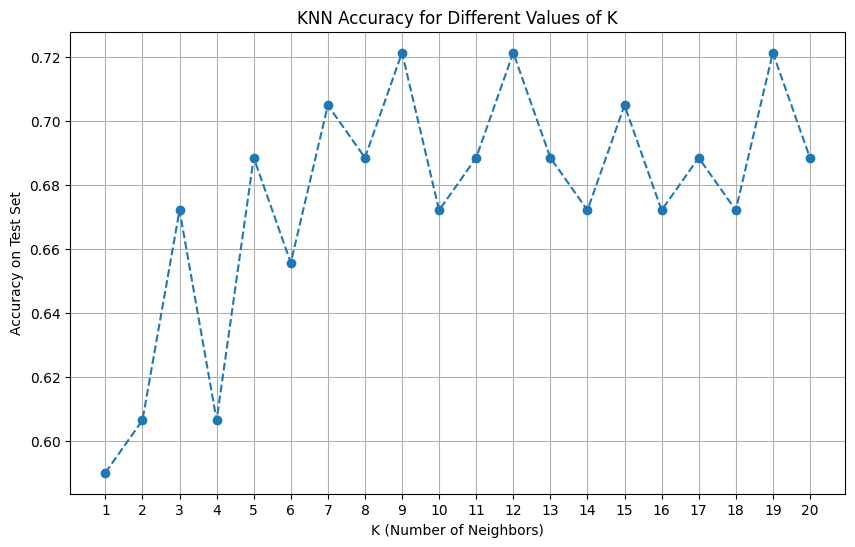

The best K value is 9 with an accuracy of 72.13%


In [22]:
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score

# Define a range of K values to test
k_values = range(1, 21) # Test K from 1 to 20
accuracies = []

for k in k_values:
    # Build the model pipeline for each k
    model_k = Pipeline([
        ('imputer', SimpleImputer(strategy='mean')),
        ('knn', KNeighborsClassifier(n_neighbors=k))
    ])

    # Train the model on the training data
    model_k.fit(X_train, y_train)

    # Use the trained model to make predictions on the unseen test data
    predictions_k = model_k.predict(X_test)

    # Calculate accuracy
    accuracy_k = accuracy_score(y_test, predictions_k)
    accuracies.append(accuracy_k)

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(k_values, accuracies, marker='o', linestyle='--')
plt.title('KNN Accuracy for Different Values of K')
plt.xlabel('K (Number of Neighbors)')
plt.ylabel('Accuracy on Test Set')
plt.xticks(list(k_values)) # Convert range to list for xticks
plt.grid(True)
plt.show()

# Print the best k and its accuracy
best_k = k_values[accuracies.index(max(accuracies))]
best_accuracy = max(accuracies)
print(f"The best K value is {best_k} with an accuracy of {best_accuracy * 100:.2f}%")

In [23]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score

# Define a range of odd K values to test (from 1 to 31)
k_values_odd = [k for k in range(1, 32) if k % 2 != 0]
accuracies_odd = []

print("Hyperparameter Hunt for K in KNN (Odd K values from 1 to 31):\n")

for k in k_values_odd:
    # Build the model pipeline for each k
    model_k_hunt = Pipeline([
        ('imputer', SimpleImputer(strategy='mean')),
        ('knn', KNeighborsClassifier(n_neighbors=k))
    ])

    # Train the model on the training data
    model_k_hunt.fit(X_train, y_train)

    # Use the trained model to make predictions on the unseen test data
    predictions_k_hunt = model_k_hunt.predict(X_test)

    # Calculate accuracy
    accuracy_k_hunt = accuracy_score(y_test, predictions_k_hunt)
    accuracies_odd.append(accuracy_k_hunt)

    print(f"K = {k}: Accuracy = {accuracy_k_hunt * 100:.2f}%")

# Optional: Find and print the best K and its accuracy from this specific hunt
best_k_hunt = k_values_odd[accuracies_odd.index(max(accuracies_odd))]
best_accuracy_hunt = max(accuracies_odd)
print(f"\nThe best K value found in this hunt is {best_k_hunt} with an accuracy of {best_accuracy_hunt * 100:.2f}%")

Hyperparameter Hunt for K in KNN (Odd K values from 1 to 31):

K = 1: Accuracy = 59.02%
K = 3: Accuracy = 67.21%
K = 5: Accuracy = 68.85%
K = 7: Accuracy = 70.49%
K = 9: Accuracy = 72.13%
K = 11: Accuracy = 68.85%
K = 13: Accuracy = 68.85%
K = 15: Accuracy = 70.49%
K = 17: Accuracy = 68.85%
K = 19: Accuracy = 72.13%
K = 21: Accuracy = 68.85%
K = 23: Accuracy = 72.13%
K = 25: Accuracy = 73.77%
K = 27: Accuracy = 72.13%
K = 29: Accuracy = 72.13%
K = 31: Accuracy = 70.49%

The best K value found in this hunt is 25 with an accuracy of 73.77%


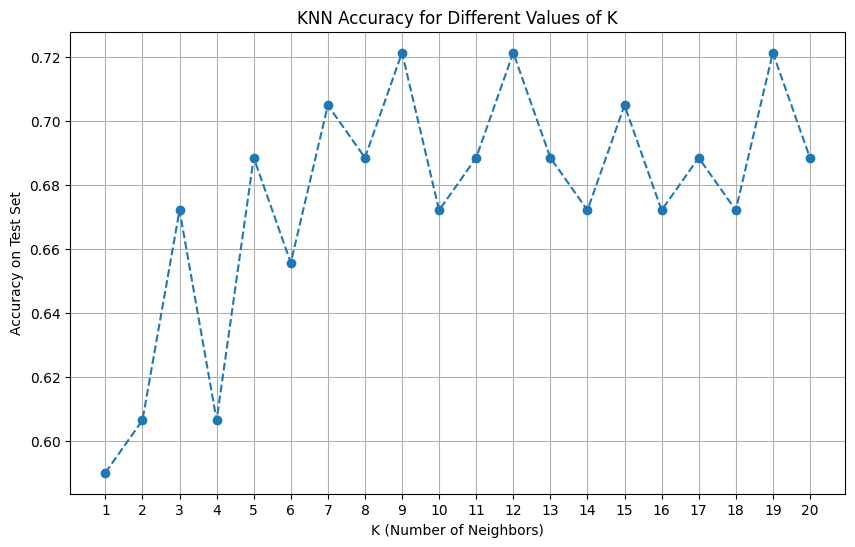

The best K value is 9 with an accuracy of 72.13%


In [24]:
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score

# Define a range of K values to test
k_values = range(1, 21) # Test K from 1 to 20
accuracies = []

for k in k_values:
    # Build the model pipeline for each k
    model_k = Pipeline([
        ('imputer', SimpleImputer(strategy='mean')),
        ('knn', KNeighborsClassifier(n_neighbors=k))
    ])

    # Train the model on the training data
    model_k.fit(X_train, y_train)

    # Use the trained model to make predictions on the unseen test data
    predictions_k = model_k.predict(X_test)

    # Calculate accuracy
    accuracy_k = accuracy_score(y_test, predictions_k)
    accuracies.append(accuracy_k)

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(k_values, accuracies, marker='o', linestyle='--')
plt.title('KNN Accuracy for Different Values of K')
plt.xlabel('K (Number of Neighbors)')
plt.ylabel('Accuracy on Test Set')
plt.xticks(list(k_values)) # Convert range to list for xticks
plt.grid(True)
plt.show()

# Print the best k and its accuracy
best_k = k_values[accuracies.index(max(accuracies))]
best_accuracy = max(accuracies)
print(f"The best K value is {best_k} with an accuracy of {best_accuracy * 100:.2f}%")